In [1]:
import os
import json
from IPython.display import display, Image
from collections import defaultdict

data_dir = '../search_based_nmt/data/raw_data'

def  get_translations(part):
    translations = defaultdict(list)

    with open(os.path.join(data_dir, 'en.{}.txt'.format(part))) as f:
        en = [l.strip() for l in f]

    with open(os.path.join(data_dir, 'he.{}.txt'.format(part))) as f:
        he = [l.strip() for l in f]

    for x,y in zip(he, en):
        translations[x].append(y)
    return translations

# Данные

## Трейн

In [2]:
train = get_translations('train')

In [3]:
print ('Строк в трейне', sum(len(v) for _, v in train.items()))
print ('Слов для перевода', len(train))

Строк в трейне 496000
Слов для перевода 296213


## Валидация

In [4]:
dev = get_translations('new_dev')

In [5]:
print ('Строк в деве', sum(len(v) for _, v in dev.items()))
print ('Слов для перевода', len(dev))

Строк в деве 1753
Слов для перевода 1747


## Тест

In [6]:
test = get_translations('new_test')

In [7]:
print ('Строк в тесте', sum(len(v) for _, v in test.items()))
print ('Слов для перевода', len(test))

Строк в тесте 1016
Слов для перевода 968


# Обучение бейзлана

Обучаем модель с attention (Bahdanau) c BiLSTM в качестве энкодера.

In [8]:
with open('baseline_all_data/train/hparams.json') as f:
    params = json.load(f)

### Параметры

In [9]:
print ('Параметры обучения', json.dumps(params, indent=4))

Параметры обучения {
    "batch_size": 128,
    "use_fixed_batch_size": false,
    "num_hidden_layers": 2,
    "kernel_height": 3,
    "kernel_width": 1,
    "hidden_size": 128,
    "compress_steps": 0,
    "dropout": 0.2,
    "clip_grad_norm": 2.0,
    "grad_noise_scale": 0.0,
    "summarize_grads": false,
    "summarize_vars": false,
    "initializer": "uniform_unit_scaling",
    "initializer_gain": 1.0,
    "label_smoothing": 0.1,
    "optimizer": "Adam",
    "optimizer_adam_epsilon": 1e-06,
    "optimizer_adam_beta1": 0.85,
    "optimizer_adam_beta2": 0.997,
    "optimizer_momentum_momentum": 0.9,
    "optimizer_momentum_nesterov": false,
    "optimizer_adafactor_beta1": 0.0,
    "optimizer_adafactor_beta2": 0.999,
    "optimizer_adafactor_factored": true,
    "optimizer_adafactor_decay_type": "pow",
    "optimizer_adafactor_memory_exponent": 0.8,
    "optimizer_adafactor_clipping_threshold": 1.0,
    "optimizer_adafactor_multiply_by_parameter_scale": true,
    "weight_decay": 0.0,

### Скрипт запуска

```bash
./run_train.sh --data_dir ../new_train/raw_data --tmp_dir ../new_train/tmp --train_dir ../new_train/train --train_steps 400000 --model lstm_seq2seq_attention_bidirectional_encoder
```

### Обучение на всех данных

In [10]:
names = [x for x in os.listdir('baseline_all_data/') if x.endswith('.png')]

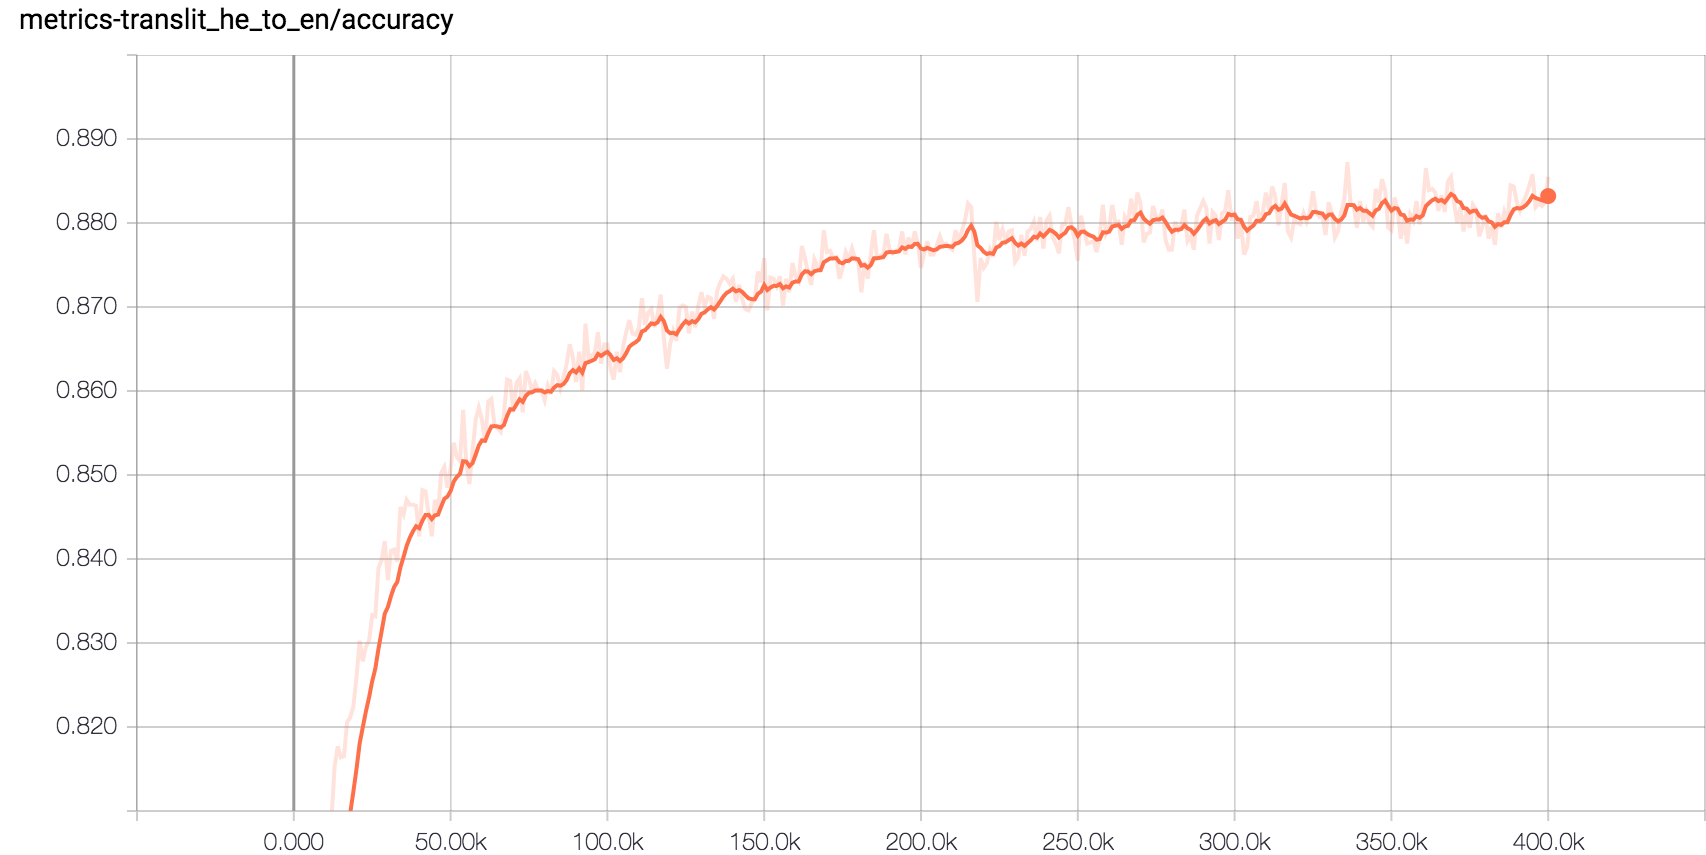

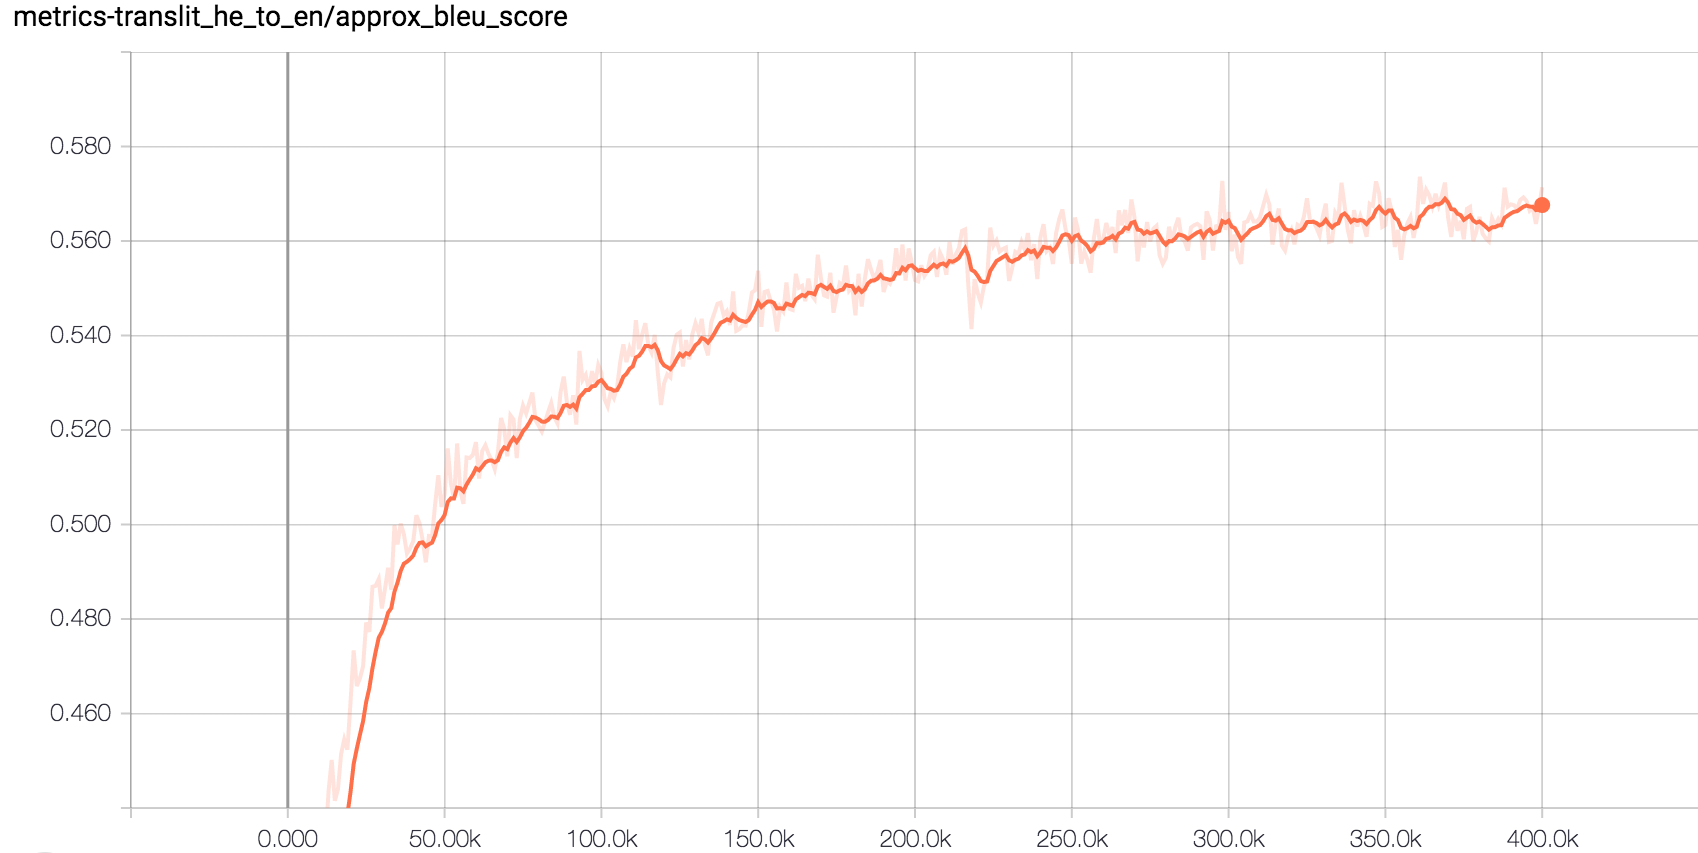

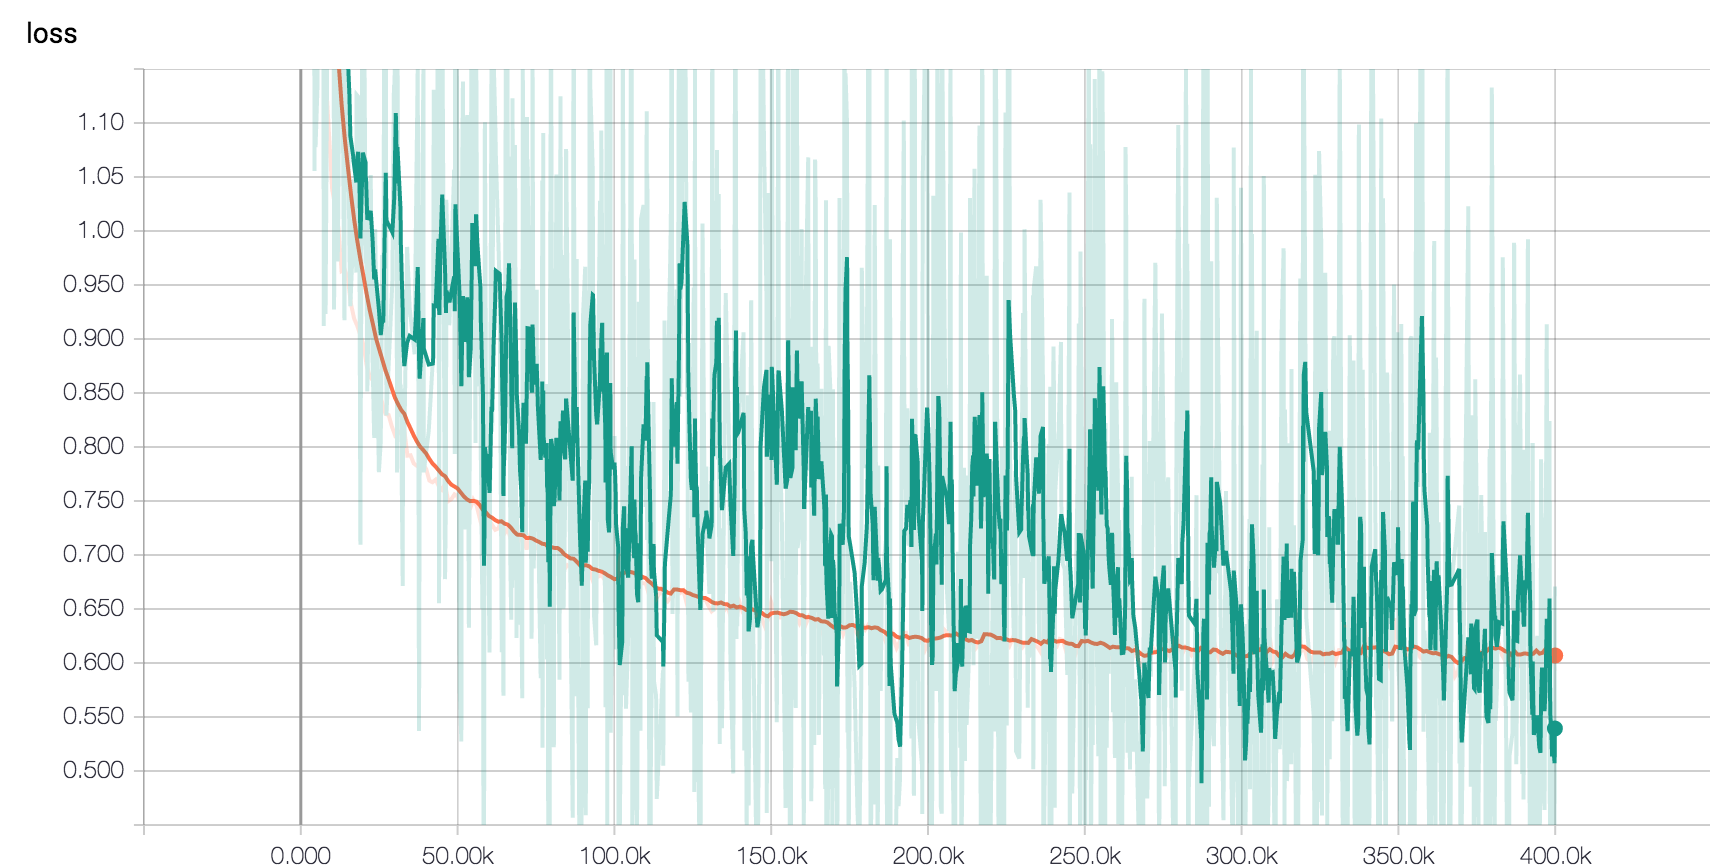

In [11]:
for n in names:
    display(Image(os.path.join('baseline_all_data', n)))

## Nltk Bleu_score

In [12]:
res = !../scripts/run_eval.sh --data_dir ../new_train/raw_data --tmp_dir ../new_train/tmp --train_dir ../new_train/train --model lstm_seq2seq_attention_bidirectional_encoder --smooth_method 3

In [13]:
print ('bleu', res[-1])

bleu 0.6858985076077523


In [14]:
with open('../new_train/raw_data/en.test.txt') as f:
    en_test = [l.strip() for l in f]
with open('../new_train/raw_data/he.test.txt') as f:
    he_test = [l.strip() for l in f]
with open('../new_train/raw_data/he-to-en.translit.results.txt') as f:
    pred = [l.strip() for l in f]
    
reference_translits = defaultdict(list)
predicted_translits = {}

for src, trg, pr in zip(he_test, en_test, pred):
    reference_translits[src].append(trg)
    predicted_translits[src] = pr

In [16]:
for i, k in enumerate(reference_translits.keys()):
    print ('{:<4}'.format(i), 'src {:>20}'.format(k), 
           '| ref {:>20}'.format(','.join(reference_translits[k])),
           '| pred {:>20}'.format(predicted_translits[k])
          )

0    src                  ערק | ref                 araq | pred                  ira
1    src                 להבה | ref               lehava | pred               lahava
2    src                  דיג | ref                dayag | pred                   di
3    src                   שט | ref                 shat | pred                  sha
4    src                  רשע | ref          resha,rasha | pred                 rese
5    src                לקלקל | ref              lkalkel | pred             lkalakah
6    src                  צלב | ref               tzalav | pred                tsalh
7    src             גרוזינית | ref             gruzinit | pred             gruzinit
8    src                   דם | ref                  dam | pred                   di
9    src                מלטזי | ref              maltezi | pred              maltezi
10   src                 ממלץ | ref              mumlats | pred               mamlet
11   src                 טחון | ref               takhun | pred  

239  src                 מאמר | ref               maamar | pred              maamara
240  src                 פרחה | ref               frekha | pred               parakh
241  src               תפוחים | ref             tapukhim | pred             tapukhim
242  src                  טיס | ref                tayis | pred                 tish
243  src                 נצרת | ref              natsrat | pred              nitsrat
244  src               הצפוני | ref             hatsfoni | pred             htsafoni
245  src              אוקינוס | ref              okyanos | pred               okinos
246  src                 הביס | ref                hevis | pred               habisa
247  src                  פאה | ref                  pea | pred                  paa
248  src                גנבתי | ref              ganavti | pred              ganavti
249  src                ושמתם | ref              vsamtem | pred            vshamatam
250  src                 אבזר | ref                avzar | pred  

757  src                 היתה | ref                haita | pred                heyte
758  src               עפיפון | ref               afifon | pred               apipon
759  src                 מרפק | ref               marpek | pred              marpekh
760  src                 משלש | ref            meshulash | pred                masle
761  src                הפליץ | ref              hiflits | pred             hapalits
762  src                 חוקר | ref               khoker | pred              khukaar
763  src                 חיקו | ref                cheko | pred              khayako
764  src                האו״ם | ref               hau.m. | pred                 haum
765  src                   שק | ref                  sak | pred                   sa
766  src                  קדש | ref               kodesh | pred                khade
767  src                 יעקב | ref               yaaqov | pred                yaake
768  src               ותאמרן | ref            vatomarna | pred  

## Валидация на деве

In [23]:
res = !../scripts/run_eval.sh --data_dir ../new_train/raw_data --tmp_dir ../new_train/tmp --test_name dev --train_dir ../new_train/train --model lstm_seq2seq_attention_bidirectional_encoder --smooth_method 3


In [24]:
res[-1]

'0.6532310246062354'